# <font color=blue> 1 Introduction

### 1.1 Background

A commercial success movie not only entertains audience, but also enables film companies to gain tremendous profit. A lot of factors such as good directors, experienced actors are considerable for creating good movies. However, famous directors and actors can always bring an expected box-office income but cannot guarantee a highly rated imdb score.

### 1.2 Data Description

The dataset is from Kaggle website. It contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

The original dataset has been replaced in Kaggle, here’s the link for the original dataset from Dataworld:

https://data.world/data-society/imdb-5000-movie-dataset


### 1.3 Problem Statement

Based on the massive movie information, it would be interesting to understand what are the important factors that make a movie more successful than others. So, we would like to analyze what kind of movies are more successful, in other words, get higher IMDB score. We also want to show the results of this analysis in an intuitive way by visualizing outcome using Python libraries

In this project, we take IMDB scores as response variable and focus on operating predictions by analyzing the rest of variables in the IMDB 5000 movie data. The results can help film companies to understand the secret of generating a commercial success movie.






# <font color=blue> 2 Data Exploration

### 2.1 Importing the libraries

In [63]:
# loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
np.warnings.filterwarnings('ignore')

### 2.2 Loading the data

In [64]:
#reading the csv file
data=pd.read_csv("movie_metadata.csv")

In [65]:
#getting top 5 records
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 2.3 Initial summary statistics

In [66]:
# getting the column values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [67]:
# shape of the dataset
data.shape

(5043, 28)

In [68]:
#column data types
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [69]:
# summary statistics of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


# <font color=blue>3 Data Cleaning

## 3.1 Remove unnecessary columns

In [70]:
#Dropping the Imdb link from the dataset as it doesn't contribute anything for score prediction 

data.drop('movie_imdb_link', axis=1, inplace=True)



In [71]:
#Removing the color section as most of the movies is colored

data["color"].value_counts()

data.drop('color',axis=1,inplace=True)



In [72]:
# Removing the language column as most of the movies are English

data['language'].value_counts().head(10)


English      4704
French         73
Spanish        40
Hindi          28
Mandarin       26
German         19
Japanese       18
Italian        11
Cantonese      11
Russian        11
Name: language, dtype: int64

In [73]:
data.drop('language',axis=1,inplace=True)

In [74]:
# removing the country column
data.drop('country',axis=1,inplace=True)

In [75]:
#removing the content_rating
data.drop('content_rating',axis=1,inplace=True)


In [76]:
#removing the aspect_ratio
data.drop('aspect_ratio',axis=1,inplace=True)

## 3.2 Checking the null values

In [77]:
data.isnull().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

### 3.2.1 Removing the null values from few columns

In [78]:
# We can remove the null values from the dataset where the count is less . so that we don't loose much data 

data.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','actor_2_facebook_likes'],inplace=True)

### 3.2.2 Imputing other columns values with missing data imputation methods like mean,median and mode values

In [79]:


#We need to replace the value in budget with the median of the value

data["budget"].fillna(data["budget"].median(),inplace=True)


# We need to replace the value in gross with the median of the value 

data['gross'].fillna(data['gross'].median(),inplace=True)

### 3.2.3 Validating the null values

In [80]:
# Recheck that all the null values are removed

data.isna().sum()

director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
plot_keywords                112
num_user_for_reviews           0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

## 3.3 Checking the duplicates

In [81]:
# checking the duplicate rows in the dataset
data.duplicated().sum()



43

### 3.3.1 Removing the duplicates

In [82]:
# replacing the duplicate rows
data.drop_duplicates(inplace=True)
data.duplicated().sum()


0

In [83]:
data.shape

(4814, 22)

# <font color =blue> 4 Data Visuaization

## 4.1 IMDB rating score
From the below histogram we can infer that 90% of the movies fall in the category of 5-8 imdb score

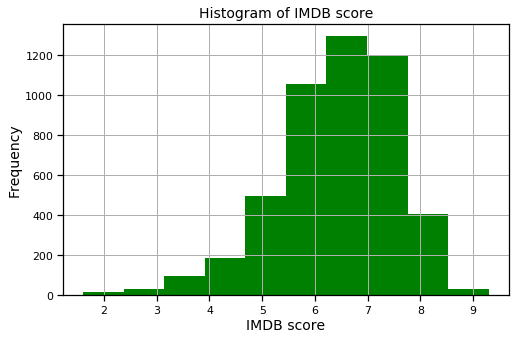

In [84]:
# let's check the imdb rating score
plt.figure(figsize=(8,5))

data['imdb_score'].hist(color='g')
plt.xlabel('IMDB score',fontsize =14)
plt.ylabel('Frequency',fontsize =14);
plt.title("Histogram of IMDB score",fontsize =14);

## 4.2 IMDB score VS movie facebook popularity

The social network is a good way to estimate the popularity of certain phenomena. Therefore it is interesting to know how does the IMDB score correlate with the movie popularity in the social network. From the scatter plot below, we can find that overall, the movies that have very high facebook likes tend to be the ones that have IMDB scores around 8.0

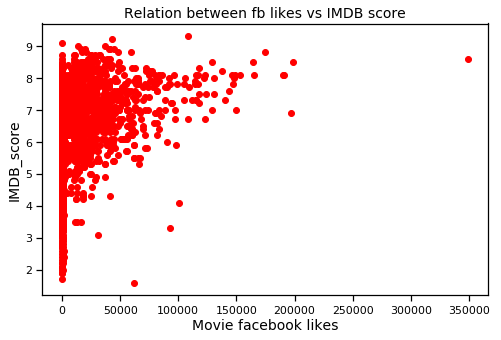

In [85]:
plt.figure(figsize=(8,5))
plt.scatter(x=data['movie_facebook_likes'], y=data['imdb_score'],color='r');
plt.xlabel('Movie facebook likes',fontsize =14)
plt.ylabel('IMDB_score',fontsize =14);
plt.title("Relation between fb likes vs IMDB score",fontsize =14);

## 4.3 IMDB score VS director facebook popularity and top 3 actors/actresses facebook popularity

From the plot below, it can be seen that the directors who directed movies of rating higher than 6.0 tend to have more facebook popularity than the ones who directed movies of rating lower than 6.0.

The top first actor/actress has the most number of facebook popularity, while the second and the third actor/actress have much lower popularity. But it can also be shown that, high facebook popularity of the leading actor/actress does not mean that a movie is of high rating.

(0, 600000)

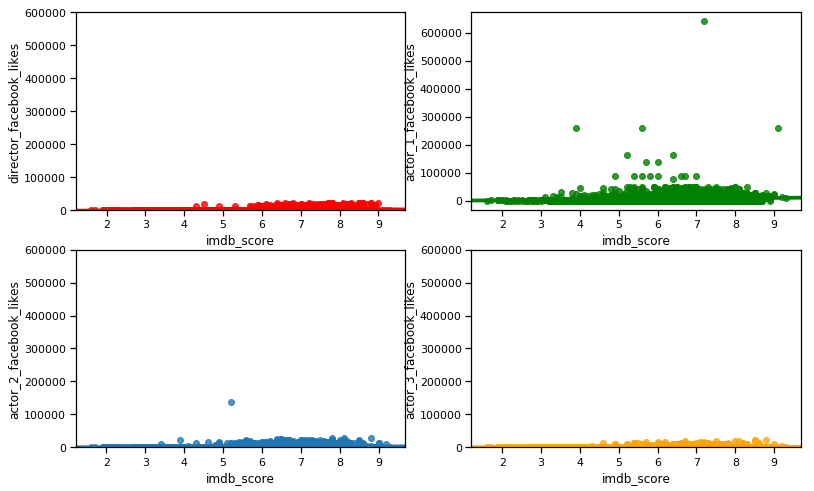

In [86]:

fig,ax=plt.subplots(2,2,figsize=(13,8));
plt.subplot(2,2,1)
plt.ylim(0,600000)
sns.regplot(data['imdb_score'],data['director_facebook_likes'],color='r');
plt.subplot(2,2,2)
sns.regplot(data['imdb_score'],data['actor_1_facebook_likes'],color='g');
plt.subplot(2,2,3)
sns.regplot(data['imdb_score'],data['actor_2_facebook_likes']);
plt.ylim(0,600000)
plt.subplot(2,2,4)
sns.regplot(data['imdb_score'],data['actor_3_facebook_likes'],color='orange');
plt.ylim(0,600000)

# <font color=blue> 4 Data Preparation

## 4.1 Removing the columns with names

In [87]:
#Removing the director name column

data.drop('director_name', axis=1, inplace=True)

#Removing the actor1 ,actor 2 and actor 3 names 

data.drop('actor_1_name',axis=1,inplace=True)

data.drop('actor_2_name',axis=1,inplace=True)

data.drop('actor_3_name',axis=1,inplace=True)

#Dropping the movie title 

data.drop('movie_title',axis=1,inplace=True)

# Dropping the plot keywords
data.drop('plot_keywords',axis=1,inplace=True)

In [88]:
#Value count of genres

data['genres'].value_counts()[:10]

Drama                          224
Comedy                         193
Comedy|Drama                   185
Comedy|Drama|Romance           183
Comedy|Romance                 153
Drama|Romance                  148
Crime|Drama|Thriller            94
Horror                          68
Action|Crime|Thriller           64
Action|Crime|Drama|Thriller     63
Name: genres, dtype: int64

In [89]:
#Most of the values are equally distributed in genres column ,so we can remove the genres column

data.drop('genres',axis=1,inplace =True)

## 4.2 Removing the highly correlated variables

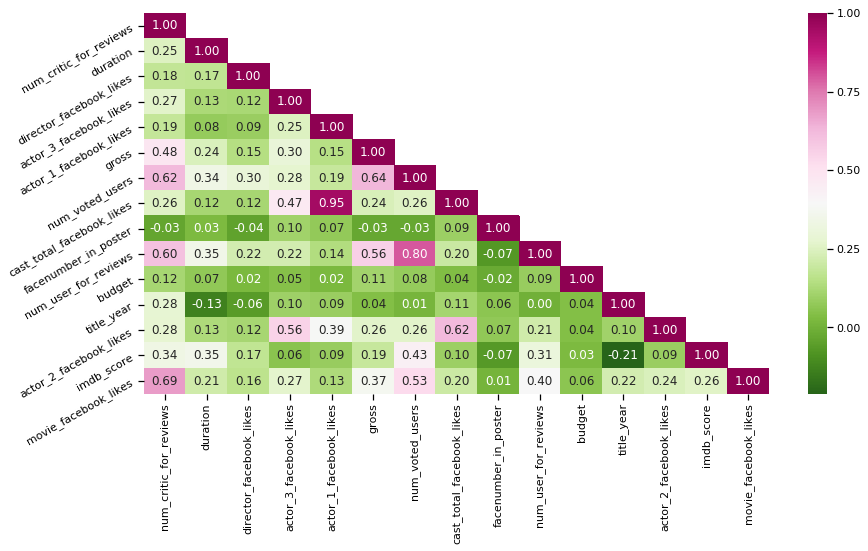

In [90]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(14,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f',cmap='PiYG_r')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

The “imdb_score” has very small but positive correlation with the “director_facebook_likes”, meaning a popular director does not necessarily mean his directed movie is great.

The “imdb_score” has very small but positive correlation with the “actor_1_facebook_likes”, meaning that an actor is popular in social network does not mean that a movie is high rating if he is the leading actor. So do supporting actors.

The “imdb_score” has small but positive correlation with “duration”. Long movies tend to have high rating.

The “imdb_score” has small but negative correlation with “facenumber_in_poster”. It is perhaps not a good idea to have many faces in movie poster if a movie wants to be great.

The “imdb_score” has almost no correlation with “budget”. Throwing money at a movie will not necessarily make it great.

We can see that the cast_total_facebook_likes and actor_1_facebook_like are highly correlated to each other. Both actor2 and actor3 are also somehow correlated to the total. So we want to modify them into two variables: actor_1_facebook_likes and other_actors_facebook_likes.

There are high correlations among num_voted_users, num_user_for_reviews and num_critic_for_reviews. We want to keep num_voted_users and take the ratio of num_user_for_reviews and num_critic_for_reviews.

In [91]:
#Adding the facebook likes of actor 2 and actor 3 together 
data['Other_actor_facebbok_likes']=data["actor_2_facebook_likes"] + data['actor_3_facebook_likes']

#Dropping the actor 2 and actor 3 facebook likes columns as they have been added together 

data.drop('actor_2_facebook_likes',axis=1,inplace=True)

data.drop('actor_3_facebook_likes',axis=1,inplace=True)

data.drop('cast_total_facebook_likes',axis=1,inplace=True)
data.drop('gross',axis=1,inplace=True)
data.drop('num_voted_users',axis=1,inplace=True)
data.drop('title_year',axis=1,inplace=True)


In [92]:
#Ratio of the ratio of num_user_for_reviews and num_critic_for_reviews.

data['critic_review_ratio']=data['num_critic_for_reviews']/data['num_user_for_reviews']

#Dropping the num_critic_for_review

data.drop('num_critic_for_reviews',axis=1,inplace=True)
data.drop('num_user_for_reviews',axis=1,inplace=True)

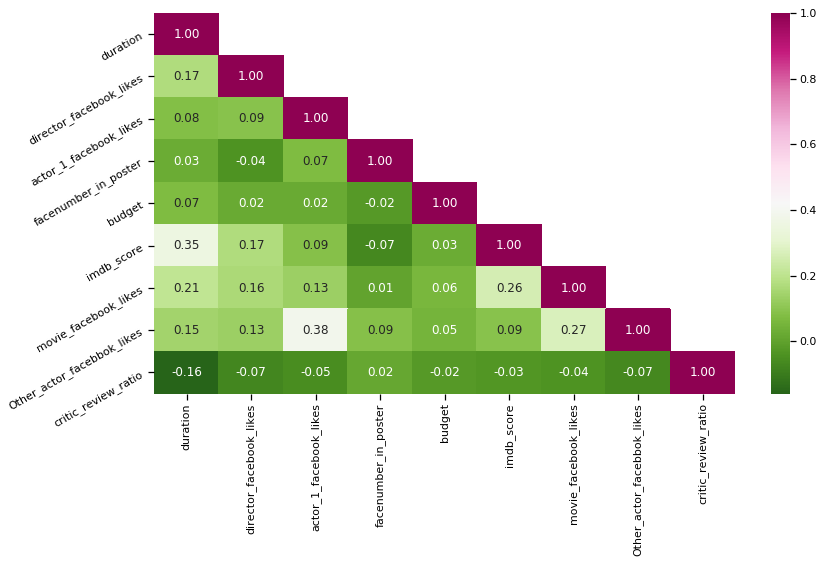

In [93]:
# New Correlation matrix shown in the figure 

import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f',cmap='PiYG_r')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Now we can see none of the attributes are not much correlated to each other.All are below 0.7

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4814 entries, 0 to 5042
Data columns (total 9 columns):
duration                      4814 non-null float64
director_facebook_likes       4814 non-null float64
actor_1_facebook_likes        4814 non-null float64
facenumber_in_poster          4814 non-null float64
budget                        4814 non-null float64
imdb_score                    4814 non-null float64
movie_facebook_likes          4814 non-null int64
Other_actor_facebbok_likes    4814 non-null float64
critic_review_ratio           4814 non-null float64
dtypes: float64(8), int64(1)
memory usage: 376.1 KB


## 4.4 Spliting the data into train test split


In [96]:
X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes','facenumber_in_poster','budget','movie_facebook_likes','Other_actor_facebbok_likes','critic_review_ratio'],data=data)
y=pd.DataFrame(columns=['imdb_score'],data=data)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

## 4.5 Feature scaling

In [98]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# <font color=blue>5 Model selection

## 5.1 Ridge Regression - 86.5% score

In [99]:
# Import scikit-learn modules
from sklearn.model_selection import cross_validate
from sklearn import linear_model,svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [100]:

# Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model, svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,ExtraTreesRegressor

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
ridge = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
ridge.fit(X_train, y_train)

# summarize the results of the grid search
print(ridge.best_score_)
print(ridge.best_estimator_)


0.15805477489646597
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [101]:
ridge_best=ridge.best_estimator_
y_pred=ridge_best.predict(X_test)

In [102]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model Evaluation
print('R^2:',metrics.r2_score(y_test,y_pred))
#print('Adjusted R^2:',1 - (1-metrics.r2_score(train_y, y_pred))*(len(train_y)-1)/(len(train_y)-train_X.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.2054882603520234
MAE: 0.7613331481442316
MAPE: 13.410282328028137
MSE: 0.9457129105224056
RMSE: 0.9724777172369584


In [103]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_accuracy = evaluate(ridge_best, X_test,y_test)
print(base_accuracy)

Model Performance
imdb_score    86.589718
dtype: float64


## 5.2 Random Forest - 88% score

In [104]:
param_grid={'n_estimators':[1, 2, 5, 10, 20, 35, 50, 100, 200],'max_features':[0.25, 0.5, 0.75, 1],'max_depth':[3, 6, 8, 10, 15, 25]}
rf=GridSearchCV(RandomForestRegressor(), param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
rf.fit(X_train, y_train)
print(rf.best_estimator_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 326 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 900 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 1025 out of 1080 | elapsed:    9.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   11.5s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [105]:
rf_best=rf.best_estimator_
y_pred=rf_best.predict(X_test)

# Model Evaluation
print('R^2:',metrics.r2_score(y_test,y_pred))
#print('Adjusted R^2:',1 - (1-metrics.r2_score(train_y, y_pred))*(len(train_y)-1)/(len(train_y)-train_X.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.3904517953148099
MAE: 0.6474370644939246
MAPE: 17.403141346766947
MSE: 0.7255495142361882
RMSE: 0.8517919430448895


In [107]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    predictions=predictions.reshape(1445,1)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

rf_accuracy= evaluate(rf_best, X_test,y_test)
print(rf_accuracy)

Model Performance
imdb_score    88.602124
dtype: float64


In [108]:
base_models = [ExtraTreesRegressor(n_estimators= 5,
                          criterion= 'mse',
                          max_features = 'log2',
                          random_state = 40),
               RandomForestRegressor(n_estimators= 5,
                               criterion= 'mse',
                               max_features = 'sqrt',
                               min_samples_split = 3,
                               random_state = 40)]  
tuned_parameters = {    'base_estimator':base_models,
                        'loss' : ['exponential']
                        ,'random_state' : [47]
                        ,'learning_rate' : [1]
                         }
ab = GridSearchCV(AdaBoostRegressor(), tuned_parameters, cv=4)
ab.fit(X_train, y_train)
print(ab.best_estimator_)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=3,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=5,
                      

## 5.4 Adaboost Regressor - 88.36% Score


In [109]:
ab_best=ab.best_estimator_
y_pred=ab_best.predict(X_test)

# Model Evaluation
print('R^2:',metrics.r2_score(y_test,y_pred))
#print('Adjusted R^2:',1 - (1-metrics.r2_score(train_y, y_pred))*(len(train_y)-1)/(len(train_y)-train_X.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.3739920711392032
MAE: 0.664150387213709
MAPE: 17.123985854610762
MSE: 0.7451416396633164
RMSE: 0.8632158708360942


In [111]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    predictions=predictions.reshape(1445,1)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

ab_accuracy= evaluate(ab_best, X_test,y_test)
print(ab_accuracy)

Model Performance
imdb_score    88.368761
dtype: float64


# 6 Conclusion

1. From the above analysis we can conclude that Adaboost and Random Forest regressor performed better compared to Ridge regression
2. The highest accuracy acheived is 88.36%
3. The most import factors that affects the imdb score are duration,facebook popularity of director,facebook popularity of top three actors.